### KNN

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
df = pd.read_csv('nba_2013.csv',usecols=['player','pos','g','gs','pts'])

In [7]:
df.head()

,player,pos,g,gs,pts
0,Quincy Acy,SF,63,0,171
1,Steven Adams,C,81,20,265
2,Jeff Adrien,PF,53,12,362
3,Arron Afflalo,SG,73,73,1330
4,Alexis Ajinca,C,56,30,328


In [10]:
from sklearn.neighbors import KNeighborsRegressor
dir(KNeighborsRegressor)
knn = KNeighborsRegressor()

In [11]:
df.isnull().sum()

player    0
pos       0
g         0
gs        0
pts       0
dtype: int64

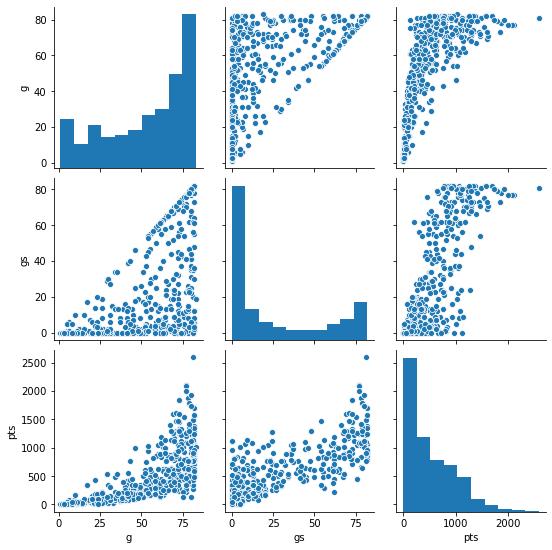

In [12]:
sns.pairplot(data=df)

In [14]:
df['player'].nunique() - len(df)
# This tells us that all the players are unique... But player name may matter based on his skills.

0

In [15]:
df['pos'].nunique()

7

In [16]:
df['pos'].value_counts()
# Lets remove F,G as they're rare category and might cause problems

SG    109
SF     99
PF     96
C      90
PG     85
F       1
G       1
Name: pos, dtype: int64

In [19]:
del_ind = df[(df['pos']=='F')|(df['pos']=='G')].index

In [22]:
new_df = df.drop(del_ind)

In [26]:
new_df.reset_index(drop=True,inplace=True)

In [28]:
new_df.head()

,player,pos,g,gs,pts
0,Quincy Acy,SF,63,0,171
1,Steven Adams,C,81,20,265
2,Jeff Adrien,PF,53,12,362
3,Arron Afflalo,SG,73,73,1330
4,Alexis Ajinca,C,56,30,328


In [30]:
dummy_df = pd.get_dummies(new_df[['pos']],drop_first=True)

In [32]:
new = pd.concat([new_df,dummy_df],axis=1)

In [34]:
new = new.drop(['pos'],axis=1)

In [46]:
new = new.drop(['player'],axis=1)

In [47]:
new.head()

,g,gs,pts,pos_PF,pos_PG,pos_SF,pos_SG
0,63,0,171,0,0,1,0
1,81,20,265,0,0,0,0
2,53,12,362,1,0,0,0
3,73,73,1330,0,0,0,1
4,56,30,328,0,0,0,0


In [48]:
X = new.drop('pts',axis=1)
y = new['pts']

In [106]:
knn.fit(X_train,y_train)

KNeighborsRegressor()

In [107]:
pred = knn.predict(X_test)

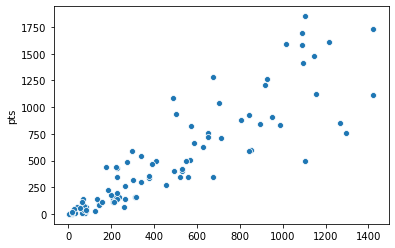

In [108]:
sns.scatterplot(pred,y_test)

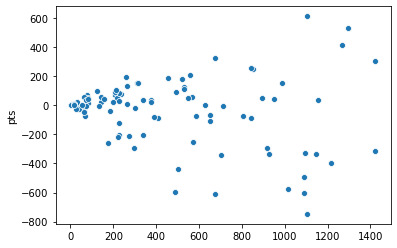

In [110]:
sns.scatterplot(pred,(pred-y_test))

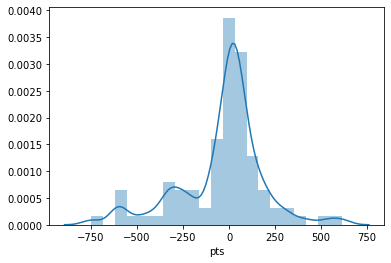

In [111]:
sns.distplot(pred-y_test)

In [112]:
params = {
    'n_neighbors' : [3,5,7,9,11,13,15,21],
    'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'weights' : ['uniform', 'distance']
}
knnr = RandomizedSearchCV(knn,params,n_jobs=-1,cv=5)

In [113]:
knnr.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=KNeighborsRegressor(), n_jobs=-1,
                   param_distributions={'algorithm': ['auto', 'ball_tree',
                                                      'kd_tree', 'brute'],
                                        'n_neighbors': [3, 5, 7, 9, 11, 13, 15,
                                                        21],
                                        'weights': ['uniform', 'distance']})

In [114]:
knnr.best_params_

{'weights': 'uniform', 'n_neighbors': 15, 'algorithm': 'ball_tree'}

In [115]:
knnr.best_estimator_

KNeighborsRegressor(algorithm='ball_tree', n_neighbors=15)

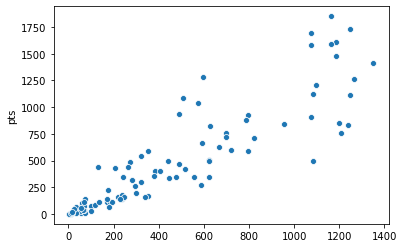

In [116]:
knn = KNeighborsRegressor(algorithm='ball_tree', n_neighbors=15)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)
sns.scatterplot(pred,y_test)

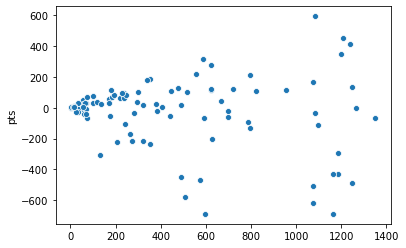

In [117]:
sns.scatterplot(pred,(pred-y_test))

In [118]:
knn.score(X_test,y_test)

0.7816184155570853

In [49]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

In [50]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [51]:
rf.fit(X_train,y_train)

RandomForestRegressor()

In [52]:
pred = rf.predict(X_test)

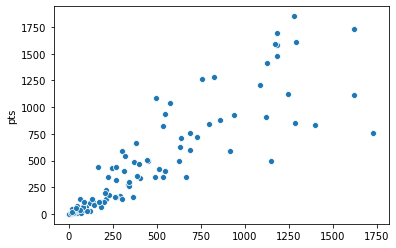

In [53]:
sns.scatterplot(pred,y_test)

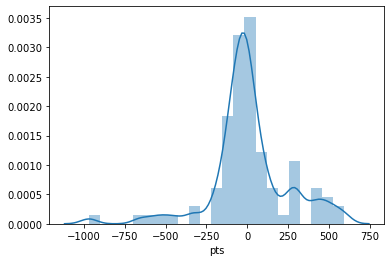

In [54]:
sns.distplot(y_test-pred)

In [55]:
rf.score(X_test,y_test)

0.7482051331279327

In [62]:
grid_param = {
    "n_estimators" : [90,100,115,130],
    'max_depth' : range(2,20,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
    'max_features' : ['auto','log2']
}

In [63]:
from sklearn.model_selection import RandomizedSearchCV
grid_search = RandomizedSearchCV(estimator=rf,param_distributions=grid_param,cv=5,n_jobs =-1,verbose = 3)

In [64]:
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    7.4s finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': range(2, 20),
                                        'max_features': ['auto', 'log2'],
                                        'min_samples_leaf': range(1, 10),
                                        'min_samples_split': range(2, 10),
                                        'n_estimators': [90, 100, 115, 130]},
                   verbose=3)

In [66]:
grid_search.best_params_

{'n_estimators': 90,
 'min_samples_split': 6,
 'min_samples_leaf': 2,
 'max_features': 'log2',
 'max_depth': 13}

In [67]:
grid_search.best_estimator_

RandomForestRegressor(max_depth=13, max_features='log2', min_samples_leaf=2,
                      min_samples_split=6, n_estimators=90)

In [68]:
rf = RandomForestRegressor(max_depth=13, max_features='log2', min_samples_leaf=2,
                      min_samples_split=6, n_estimators=90)
rf.fit(X_train,y_train)

RandomForestRegressor(max_depth=13, max_features='log2', min_samples_leaf=2,
                      min_samples_split=6, n_estimators=90)

In [69]:
pred = rf.predict(X_test)

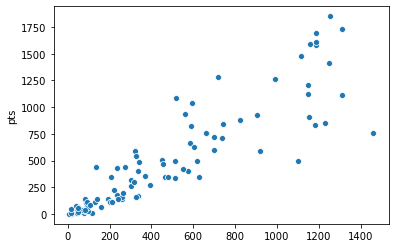

In [70]:
sns.scatterplot(pred,y_test)

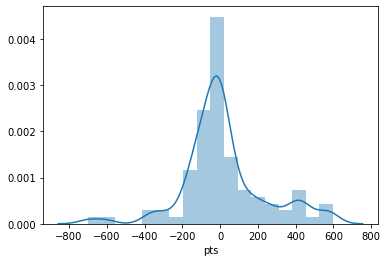

In [71]:
sns.distplot(y_test-pred)

In [72]:
rf.score(X_test,y_test)

0.7888163664497092

In [73]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 

In [77]:
vif = [variance_inflation_factor(new.values, i) for i in range(new.shape[1])]
print(vif)

[7.248232001468297, 5.2174311887393685, 8.512779036735399, 1.6094333229063715, 1.4836101641020005, 1.5806561280214146, 1.576531488669205]


In [78]:
new.columns

Index(['g', 'gs', 'pts', 'pos_PF', 'pos_PG', 'pos_SF', 'pos_SG'], dtype='object')

In [82]:
import xgboost as xgb

In [83]:
xgbr = xgb.XGBRegressor()

In [84]:
xgbr.fit(X_train,y_train)

[20:37:51] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [85]:
pred = xgbr.predict(X_test)

In [86]:
xgbr.score(X_test,y_test)

0.7734150892234825

In [87]:
xgb.XGBRegressor(
    max_depth=3,
    learning_rate=0.1,
    n_estimators=100,
    verbosity=1,
    silent=None,
    objective='reg:linear',
    booster='gbtree',
    n_jobs=1,
    nthread=None,
    gamma=0,
    min_child_weight=1,
    max_delta_step=0,
    subsample=1,
    colsample_bytree=1,
    colsample_bylevel=1,
    colsample_bynode=1,
    reg_alpha=0,
    reg_lambda=1,
    scale_pos_weight=1,
    base_score=0.5,
    random_state=0,
    seed=None,
    missing=None,
    importance_type='gain'
)

XGBRegressor()

In [98]:
params = {
    "n_estimators" : [int(i) for i in np.linspace(100,1200,12)],
    "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ] }

In [99]:
xgbrr = RandomizedSearchCV(xgbr,params,n_jobs=-1,cv=5)

In [100]:
xgbrr.fit(X_train,y_train)

[21:33:47] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


RandomizedSearchCV(cv=5, estimator=XGBRegressor(), n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                                             0.7],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          0.25, 0.3],
                                        'max_depth': [3, 4, 5, 6, 8, 10, 12,
                                                      15],
                                        'min_child_weight': [1, 3, 5, 7],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]})

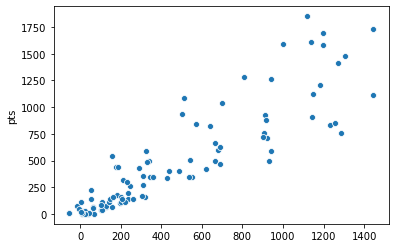

In [101]:
pred = xgbrr.predict(X_test)
sns.scatterplot(pred,y_test)

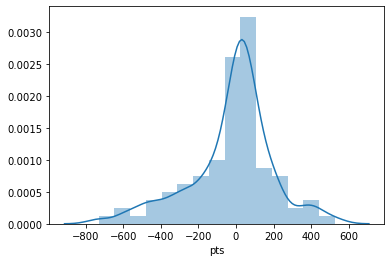

In [102]:
sns.distplot(pred-y_test)

In [103]:
xgbrr.score(X_test,y_test)

0.7865692112224952

In [104]:
np.linspace(100,1200,12)

array([ 100.,  200.,  300.,  400.,  500.,  600.,  700.,  800.,  900.,
       1000., 1100., 1200.])

### Frequency of words

In [119]:
from bs4 import BeautifulSoup
import urllib.request
import nltk

response = urllib.request.urlopen('http://php.net/')
html = response.read()
soup = BeautifulSoup(html,"html5lib")

In [125]:
type(soup)

bs4.BeautifulSoup

In [126]:
soup

<!DOCTYPE html>
<html lang="en" xmlns="http://www.w3.org/1999/xhtml"><head>

  <meta charset="utf-8"/>
  <meta content="width=device-width, initial-scale=1.0" name="viewport"/>

  <title>PHP: Hypertext Preprocessor</title>

 <link href="https://www.php.net/favicon.ico" rel="shortcut icon"/>
 <link href="http://php.net/phpnetimprovedsearch.src" rel="search" title="Add PHP.net search" type="application/opensearchdescription+xml"/>
 <link href="https://www.php.net/releases/feed.php" rel="alternate" title="PHP Release feed" type="application/atom+xml"/>
 <link href="https://www.php.net/feed.atom" rel="alternate" title="PHP: Hypertext Preprocessor" type="application/atom+xml"/>

 <link href="https://www.php.net/index.php" rel="canonical"/>
 <link href="https://www.php.net/index" rel="shorturl"/>
 <link href="https://www.php.net/index" hreflang="x-default" rel="alternate"/>



<link href="/cached.php?t=1539771603&amp;f=/fonts/Fira/fira.css" media="screen" rel="stylesheet" type="text/css"/>
<

In [122]:
import string
t = string.punctuation

In [129]:
soup.findAll()

[<html lang="en" xmlns="http://www.w3.org/1999/xhtml"><head>
 
   <meta charset="utf-8"/>
   <meta content="width=device-width, initial-scale=1.0" name="viewport"/>
 
   <title>PHP: Hypertext Preprocessor</title>
 
  <link href="https://www.php.net/favicon.ico" rel="shortcut icon"/>
  <link href="http://php.net/phpnetimprovedsearch.src" rel="search" title="Add PHP.net search" type="application/opensearchdescription+xml"/>
  <link href="https://www.php.net/releases/feed.php" rel="alternate" title="PHP Release feed" type="application/atom+xml"/>
  <link href="https://www.php.net/feed.atom" rel="alternate" title="PHP: Hypertext Preprocessor" type="application/atom+xml"/>
 
  <link href="https://www.php.net/index.php" rel="canonical"/>
  <link href="https://www.php.net/index" rel="shorturl"/>
  <link href="https://www.php.net/index" hreflang="x-default" rel="alternate"/>
 
 
 
 <link href="/cached.php?t=1539771603&amp;f=/fonts/Fira/fira.css" media="screen" rel="stylesheet" type="text/css"/

In [132]:
len([str(tag) for tag in soup.find_all()])

1188

In [148]:
def remove(list): 
    pattern = '[0-9]'
    list = [re.sub(pattern, '', i) for i in list] 
    return list
l = remove([str(tag) for tag in soup.find_all()])

In [149]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
cv.fit_transform(l)

<1188x569 sparse matrix of type '<class 'numpy.int64'>'
	with 26092 stored elements in Compressed Sparse Row format>

In [150]:
cv.vocabulary_

{'html': 250,
 'lang': 296,
 'en': 164,
 'xmlns': 566,
 'http': 251,
 'www': 562,
 'org': 374,
 'xhtml': 564,
 'head': 237,
 'meta': 328,
 'charset': 90,
 'utf': 539,
 'content': 115,
 'width': 552,
 'device': 144,
 'initial': 272,
 'scale': 441,
 'name': 340,
 'viewport': 546,
 'title': 509,
 'php': 387,
 'hypertext': 254,
 'preprocessor': 402,
 'link': 306,
 'href': 248,
 'https': 252,
 'net': 346,
 'favicon': 183,
 'ico': 255,
 'rel': 424,
 'shortcut': 460,
 'icon': 256,
 'phpnetimprovedsearch': 388,
 'src': 477,
 'search': 447,
 'add': 6,
 'type': 523,
 'application': 27,
 'opensearchdescription': 370,
 'xml': 565,
 'releases': 429,
 'feed': 186,
 'alternate': 18,
 'release': 427,
 'atom': 34,
 'index': 270,
 'canonical': 78,
 'shorturl': 462,
 'hreflang': 249,
 'default': 140,
 'cached': 73,
 'amp': 19,
 'fonts': 205,
 'fira': 194,
 'css': 125,
 'media': 324,
 'screen': 442,
 'stylesheet': 485,
 'text': 496,
 'font': 203,
 'awesome': 42,
 'fontello': 204,
 'styles': 484,
 'theme':

In [151]:
pd.Series(cv.vocabulary_).sort_values(ascending=False)

your              568
you               567
xmlns             566
xml               565
xhtml             564
                 ... 
acdebede            4
acdcbbcadee         3
accesskey           2
aafddbfddbdaac      1
aaebbffa            0
Length: 569, dtype: int64